## This is a notebook for VectorPython session
You will be introduced to how to interact with vector objects in Python.

## Creating points

In [2]:
# Import necessary geometric objects from shapely module 
from shapely.geometry import Point, LineString, Polygon 

# Create Point geometric object(s) with coordinates 
point1 = Point(2.2, 4.2) 
point2 = Point(7.2, -25.1) 
point3 = Point(9.26, -2.456) 
point3D = Point(9.26, -2.456, 0.57) 

# What is the type of the point? 
point_type = type(point1)

print (point_type)

<class 'shapely.geometry.point.Point'>


Let's check how the variables look like

In [3]:
print(point1) 
print(point3D) 
print(type(point1))

POINT (2.2 4.2)
POINT Z (9.26 -2.456 0.57)
<class 'shapely.geometry.point.Point'>


### Point -object has some built-in attributes and some useful functionalities that can be accessed, e.g.,
    - to extract the coordinates of Points,
    - to calculate the Euclidian distance between them.

In [4]:
# Get the coordinates 
point_coords = point1.coords 

# What is the type of this? 
print ("The type is", type(point_coords))

# Get x and y coordinates 
xy = point_coords.xy 

# Get only x coordinates of Point1 
x = point1.x 

# What about y coordinate? 
y = point1.y 

# Print out 
print("xy variable:\n", xy, "\n") 
print("x variable:\n", x, "\n") 
print("y variable:\n", y)

The type is <class 'shapely.coords.CoordinateSequence'>
xy variable:
 (array('d', [2.2]), array('d', [4.2])) 

x variable:
 2.2 

y variable:
 4.2


As you can see, the xy -variable contains a tuple where x and y coordinates are stored inside numpy arrays. Using the attributes point1.x and point1.y, it is possible to get the coordinates directly as plain decimal numbers.


Now, we are going to calculate the distance between the two points. The returned distance depends on the projection of the points (e.g. degrees in WGS84, meters in UTM):

In [5]:
# Calculate the distance between point1 and point2
point_dist = point1.distance(point2) 

print("Distance between the points is {0:.2f} decimal degress".format(point_dist))

Distance between the points is 29.72 decimal degress


## Creating LineString

In [6]:
# Create a LineString from our Point objects 
line = LineString([point1, point2, point3])
 
# It is also possible to use coordinate tuples having the same outcome 
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])
 
# Print the results 
print("line variable: \n", line, "\n") 
print("line2 variable: \n", line2, "\n") 
print("type of the line: \n", type(line))

line variable: 
 LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456) 

line2 variable: 
 LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456) 

type of the line: 
 <class 'shapely.geometry.linestring.LineString'>


## LineString attributes and functions
We can extract the coordinates of a LineString similarly as we did with Point

In [7]:
# Get x and y coordinates of the line 
lxy = line.xy 
print("The x, y coordinates of the line is", lxy)

The x, y coordinates of the line is (array('d', [2.2, 7.2, 9.26]), array('d', [4.2, -25.1, -2.456]))


In [8]:
# Extract x coordinates 
line_x = lxy[0] 

# Extract y coordinates straight from the LineObject by referring to a array at index 1 
line_y = line.xy[1] 

print("line_x:\n", line_x, '\n') 
print('line_y:\n', line_y)


line_x:
 array('d', [2.2, 7.2, 9.26]) 

line_y:
 array('d', [4.2, -25.1, -2.456])


It is possible to retrieve specific attributes e.g., lenght of the line and center of the line (centroid) straight from the LineString object itself:


In [9]:
# Get the lenght of the line 
l_length = line.length 

# Get the centroid of the line 
l_centroid = line.centroid 

# What type is the centroid? 
centroid_type = type(l_centroid) 

# Print the outputs 
print("Length of our line: {0:.2f}".format(l_length)) 
print("Centroid of our line: ", l_centroid) 
print("Type of the centroid:", centroid_type)

Length of our line: 52.46
Centroid of our line:  POINT (6.229961354035622 -11.89241115757239)
Type of the centroid: <class 'shapely.geometry.point.Point'>


## Create a polygon

Creating a Polygon -object is similiar to points and lines creation, but you need at least three coordinate-tuples


In [10]:
# Create a Polygon from the coordinates 
poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]) 

# We can also use our previously created Point objects (same outcome) 
# --> notice that Polygon object requires x,y coordinates as input 
poly2 = Polygon([[p.x, p.y] for p in [point1, point2, point3]]) 

# Geometry type can be accessed as a String 
poly_type = poly.geom_type 

# Using the Python's type function gives the type in a different format 
poly_type2 = type(poly) 

# Let's see how our Polygon looks like 
print('poly:', poly) 
print('poly2:', poly2) 
print("Geometry type as text:", poly_type) 
print("Geometry how Python shows it:", poly_type2)

poly: POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))
poly2: POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))
Geometry type as text: Polygon
Geometry how Python shows it: <class 'shapely.geometry.polygon.Polygon'>


Notice that Polygon representation has double parentheses around the coordinates (i.e. POLYGON ((<values in here>)) ). This is because Polygon can also have holes inside of it.


According to the help of Polygon -object, a Polygon can be constructed using exterior coordinates and interior coordinates (optional) where the interior coordinates creates a hole inside the Polygon:


### Let’s see how we can create a Polygon with a hole inside.

In [11]:
# Let's create a bounding box of the world and make a whole in it # First we define our exterior 
world_exterior = [(-180, 90), (-180, -90), (180, -90), (180, 90)] 

# Let's create a single big hole where we leave ten decimal degrees at the boundaries of the world. # Notice: there could be multiple holes, thus we need to provide a list of holes 
hole = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]] 

# World without a hole 
world = Polygon(shell=world_exterior) 

# Now we can construct our Polygon with the hole inside 
world_has_a_hole = Polygon(shell=world_exterior, holes=hole)

#Let’s see what we have now
print('world:', world) 
print('world_has_a_hole:', world_has_a_hole) 
print('type:', type(world_has_a_hole))

world: POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90))
world_has_a_hole: POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-170 80, -170 -80, 170 -80, 170 80, -170 80))
type: <class 'shapely.geometry.polygon.Polygon'>


Let's see a few of the available attributes and how to access them:

In [12]:
# Get the centroid of the Polygon 
world_centroid = world.centroid 

# Get the area of the Polygon 
world_area = world.area 

# Get the bounds of the Polygon (i.e. bounding box) 
world_bbox = world.bounds 

# Get the exterior of the Polygon 
world_ext = world.exterior 

# Get the length of the exterior 
world_ext_length = world_ext.length 

# Print the outputs 
print("Poly centroid: ", world_centroid) 
print("Poly Area: ", world_area) 
print("Poly Bounding Box: ", world_bbox) 
print("Poly Exterior: ", world_ext) 
print("Poly Exterior Length: ", world_ext_length)

Poly centroid:  POINT (-0 -0)
Poly Area:  64800.0
Poly Bounding Box:  (-180.0, -90.0, 180.0, 90.0)
Poly Exterior:  LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
Poly Exterior Length:  1080.0


# Part 2

# Geopandas
You will learn 
- how to read and write spatial data, 
- how to deal with projections in Python using Geopandas 
- and some useful data management functionalities.

#### Let’s Download Land Use data for CPH

This bit will download a zip file with data for Copenhagen and unzip it into a folder called `Data2`.

In [14]:
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile

zipurl = 'https://www.eea.europa.eu/data-and-maps/data/urban-atlas/denmark/dk001l_kobenhavn.zip/at_download/file'
with urlopen(zipurl) as zipresp:
    with ZipFile(BytesIO(zipresp.read())) as zfile:
        zfile.extractall('Data2')

Let's open our fresh new shapefile using [geopandas](https://geopandas.org):

In [15]:
# Import necessary modules 
import geopandas as gpd 
import os

#Set filepath 
curwd= os.chdir("Data2")
fp = "dk001l_kobenhavn/dk001l_kobenhavn.shp" 

# Read file using gpd.read_file() 
data = gpd.read_file(fp)

print ("The type of data is", type(data))

print(data.head(10)) 


The type of data is <class 'geopandas.geodataframe.GeoDataFrame'>
      CITIES LUZ_OR_CIT   CODE                                  ITEM  \
0  Kobenhavn     DK001L  11100  Continuous Urban Fabric (S.L. > 80%)   
1  Kobenhavn     DK001L  11100  Continuous Urban Fabric (S.L. > 80%)   
2  Kobenhavn     DK001L  11100  Continuous Urban Fabric (S.L. > 80%)   
3  Kobenhavn     DK001L  11100  Continuous Urban Fabric (S.L. > 80%)   
4  Kobenhavn     DK001L  11100  Continuous Urban Fabric (S.L. > 80%)   
5  Kobenhavn     DK001L  11100  Continuous Urban Fabric (S.L. > 80%)   
6  Kobenhavn     DK001L  11100  Continuous Urban Fabric (S.L. > 80%)   
7  Kobenhavn     DK001L  11100  Continuous Urban Fabric (S.L. > 80%)   
8  Kobenhavn     DK001L  11100  Continuous Urban Fabric (S.L. > 80%)   
9  Kobenhavn     DK001L  11100  Continuous Urban Fabric (S.L. > 80%)   

  PROD_DATE    SHAPE_LEN    SHAPE_AREA  \
0      2009   267.364043   3886.243449   
1      2009  1314.838061  29226.903814   
2      2009   3

In [16]:
help(gpd.read_file)

Help on function read_file in module geopandas.io.file:

read_file(filename, bbox=None, mask=None, rows=None, **kwargs)
    Returns a GeoDataFrame from a file or URL.
    
    .. versionadded:: 0.7.0 mask, rows
    
    Parameters
    ----------
    filename: str
        Either the absolute or relative path to the file or URL to
        be opened.
    bbox: tuple | GeoDataFrame or GeoSeries | shapely Geometry, default None
        Filter features by given bounding box, GeoSeries, GeoDataFrame or a
        shapely geometry. CRS mis-matches are resolved if given a GeoSeries
        or GeoDataFrame. Cannot be used with mask.
    mask: dict | GeoDataFrame or GeoSeries | shapely Geometry, default None
        Filter for features that intersect with the given dict-like geojson
        geometry, GeoSeries, GeoDataFrame or shapely geometry.
        CRS mis-matches are resolved if given a GeoSeries or GeoDataFrame.
        Cannot be used with bbox.
    rows: int or slice, default None
        L

## Let's plot it

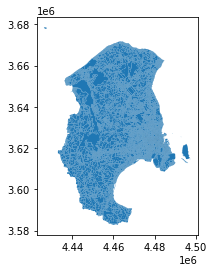

In [18]:
%matplotlib inline 
data.plot()

## How to write it to a new shapefile

In [19]:
# Set the output path for the data 
outfp = "dk001l_kobenhavn/dk001l_kobenhavn_subset.shp" 

# Select first 50 rows 
selection = data[0:50] 

# Write those rows into a new Shapefile (the default output file format is Shapefile) 
selection.to_file(outfp)

## 🏋 Exercise

Plot the subset data! Add your code in the cell below.

Let’s print the first 5 rows of the column ‘geometry’:


In [20]:
print(data['geometry'].head())

0    POLYGON ((4461387.187 3583322.185, 4461394.329...
1    POLYGON ((4461881.407 3584545.952, 4461881.821...
2    POLYGON ((4463135.744 3584557.919, 4463124.767...
3    POLYGON ((4462757.186 3584686.731, 4462651.426...
4    POLYGON ((4462562.979 3585068.766, 4462555.118...
Name: geometry, dtype: geometry


Since the spatial data is stored as Shapely objects, it is possible to use all of the functionalities of Shapely module.
Let’s prove that this is really the case by iterating over a sample of the data, and printing the area of first five polygons.
We can iterate over the rows by using the iterrows() -function.


In [21]:
# Make a selection that contains only the first five rows 
selection = data[0:5] 
# Iterate over rows and print the area of a Polygon 
for index, row in selection.iterrows(): 
    # Get the area of the polygon 
    poly_area = row['geometry'].area 
    # Print information for the user 
    print("Polygon area in m2 at index {index} is: {area:.3f}".format(index=index, area=poly_area))


Polygon area in m2 at index 0 is: 3886.369
Polygon area in m2 at index 1 is: 29228.002
Polygon area in m2 at index 2 is: 7232.469
Polygon area in m2 at index 3 is: 15392.166
Polygon area in m2 at index 4 is: 5950.144


Let’s now create a new column into our GeoDataFrame where we calculate/store the areas of polygons into that column. No need to iterate like before.


In [22]:
# Create a new column called 'area' and assign the area of the Polygons into it 
data['area'] = data.area 
# Print first 2 rows of the area column 
print(data['area'].head(5))


0     3886.368562
1    29228.001584
2     7232.468980
3    15392.166166
4     5950.143575
Name: area, dtype: float64


## Let’s get the min, max and mean of areas.


In [23]:
# Maximum area 
max_area = data['area'].max() 
# Minimum area 
min_area = data['area'].min() 
# Mean area 
mean_area = data['area'].mean() 

print("Max area: {max}\nMin area: {min}\nMean area: {mean}".format(max=round(max_area, 2), min=round(min_area, 2), mean=round(mean_area, 2)))


Max area: 84746437.22
Min area: 1000.91
Mean area: 78232.8


# Creating geometries into a GeoDataFrame

Since geopandas takes advantage of Shapely geometric objects, it is possible to create a Shapefile from scratch by passing Shapely’s geometric objects into the GeoDataFrame. This is useful as it makes it easy to convert e.g. a text file that contains coordinates into a Shapefile. Next we will see how to create a Shapefile from scratch.


Let’s create an empty GeoDataFrame.

In [24]:
import geopandas as gpd 
from shapely.geometry import Point, Polygon 

# Create an empty geopandas GeoDataFrame 
newdata = gpd.GeoDataFrame() 

# Let's see what we have at the moment 
print(newdata)


Empty GeoDataFrame
Columns: []
Index: []


Let’s create a new column called geometry that will contain our Shapely objects:

In [25]:
# Create a new column called 'geometry' to the GeoDataFrame 
newdata['geometry'] = None 

# Let's again see what's inside 
print(newdata)


Empty GeoDataFrame
Columns: [geometry]
Index: []


Now we have a geometry column in our GeoDataFrame but we don’t have any data stored yet.
Let’s create a Shapely Polygon repsenting our current location (AAU) that we can later insert to our GeoDataFrame:


In [26]:
# Coordinates of the AAU in Decimal Degrees 
coordinates = [(12.543269, 55.650061), (12.543806, 55.650511), (12.542054, 55.651096), (12.541585, 55.650672)] 

# Create a Shapely polygon from the coordinate-tuple list 
poly = Polygon(coordinates) 

# Let's see what we have 
print(poly)


POLYGON ((12.543269 55.650061, 12.543806 55.650511, 12.542054 55.651096, 12.541585 55.650672, 12.543269 55.650061))


Okay, now we have an appropriate Polygon -object.
Let’s insert the polygon into our ‘geometry’ column of our GeoDataFrame at position 0:


In [27]:
# Insert the polygon into 'geometry' -column at index 0 
newdata.loc[0, 'geometry'] = poly 

# Let's see what we have now 
print(newdata)

                                            geometry
0  POLYGON ((12.54327 55.65006, 12.54381 55.65051...


Now, we have a GeoDataFrame with a Polygon that we could already export to a Shapefile. However, typically you might want to include some useful information with your geometry.
Hence, let’s add another column to our GeoDataFrame called location with text AAU that describes the location of the feature.

In [28]:
# Add a new column and insert data 
newdata.loc[0, 'location'] = "Aalborg University"

# Let's check the data 
print(newdata)


                                            geometry            location
0  POLYGON ((12.54327 55.65006, 12.54381 55.65051...  Aalborg University


Before exporting, it is necessary to specify the coordinate reference system (projection) for the GeoDataFrame. 
GeoDataFrame has an attribute called .crs that shows the coordinate system of the data.

### 🔥 If you have never worked with GIS data before, make sure to read this [introduction to coordinate reference systems](https://docs.qgis.org/3.10/en/docs/gentle_gis_introduction/coordinate_reference_systems.html)!


In [30]:
print(newdata.crs) 

None


The CRS is not specified here, which will be a problem once we want to combine the data with other data – we simply don't know which area on the Earth it refers to, so let’s add a crs for our GeoDataFrame. fiona has a function called from_epsg() for passing the coordinate reference system information for the GeoDataFrame. Use WGS84 (epsg code: 4326):

PS. The [EPSG database](https://epsg.io) assigns standardised codes to commonly used CRSs.

In [31]:
# Import specific function 'from_epsg' from fiona module 
from fiona.crs import from_epsg 

# Set the GeoDataFrame's coordinate system to WGS84: epsg code 4326 
newdata.crs = from_epsg(4326) 

# Let's see how the crs definition looks like 
print(newdata.crs)


+init=epsg:4326 +no_defs +type=crs


/Users/carsten/miniconda3/envs/geoanalysis/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Now, we can export the GeoDataFrame using .to_file() -function.
We only need to provide the output path for the Shapefile. 


In [32]:
# Determine the output path for the Shapefile 
outfp = "AAU.shp" 

# Write the data into that Shapefile 
newdata.to_file(outfp)


# Practical example: Saving multiple Shapefiles

A very useful function that can be used in Pandas/Geopandas is .groupby(), which allows you to group data based on values on selected column(s).
Next we will take a practical example by automating the file export task. 

We will group individual land use types in our ”dk001l_kobenhavn.shp” and export those into separate Shapefiles.
Let’s start from scratch and read the Shapefile into GeoDataFrame:



In [33]:
# Read land use data 
fp = "dk001l_kobenhavn/dk001l_kobenhavn.shp" 
data = gpd.read_file(fp) 

# Print columns 
print(data.columns)

Index(['CITIES', 'LUZ_OR_CIT', 'CODE', 'ITEM', 'PROD_DATE', 'SHAPE_LEN',
       'SHAPE_AREA', 'geometry'],
      dtype='object')


The TYPE column in the data contains information about different land use types. With .unique() -function we can quickly see all different names in that column:


In [34]:
# Print all unique land use types in ‘ITEM' column 
print(data['ITEM'].unique())

['Continuous Urban Fabric (S.L. > 80%)'
 'Discontinuous Dense Urban Fabric (S.L. : 50% -  80%)'
 'Discontinuous Medium Density Urban Fabric (S.L. : 30% - 50%)'
 'Port areas' 'Isolated Structures' 'Green urban areas'
 'Sports and leisure facilities'
 'Agricultural + Semi-natural areas + Wetlands'
 'Discontinuous Low Density Urban Fabric (S.L. : 10% - 30%)' 'Forests'
 'Discontinuous Very Low Density Urban Fabric (S.L. < 10%)'
 'Industrial, commercial, public, military and private units'
 'Construction sites' 'Water bodies' 'Mineral extraction and dump sites'
 'Fast transit roads and associated land'
 'Other roads and associated land' 'Railways and associated land'
 'Airports' 'Land without current use']


Now we can use that information to group our data and save all individual land use types as separate Shapefiles:


In [35]:
# Group the data by column ‘ITEM’ 
grouped = data.groupby('CODE') 

# Let's see what we have 
grouped


As we can see, groupby -function gives us an object called DataFrameGroupBy which is similar to list of keys and values (like in a dictionary) that we can iterate over.  

Let’s iterate over the groups and see what our variables key and values contain

In [36]:
# Iterate over the group object 
for key, values in grouped: 
    individual_LU = values 
    
# Let's see what is the LAST item and key that we iterated 
print('Key:', key) 
print(individual_LU)


Key: 50000
          CITIES LUZ_OR_CIT   CODE          ITEM PROD_DATE    SHAPE_LEN  \
25647  Kobenhavn     DK001L  50000  Water bodies      2009   541.063764   
30939  Kobenhavn     DK001L  50000  Water bodies      2009   766.210454   
31000  Kobenhavn     DK001L  50000  Water bodies      2009   629.664586   
31149  Kobenhavn     DK001L  50000  Water bodies      2009   452.172169   
35809  Kobenhavn     DK001L  50000  Water bodies      2009   485.057720   
...          ...        ...    ...           ...       ...          ...   
38369  Kobenhavn     DK001L  50000  Water bodies      2009  1631.672631   
38370  Kobenhavn     DK001L  50000  Water bodies      2009   494.848134   
38371  Kobenhavn     DK001L  50000  Water bodies      2009   565.917314   
38372  Kobenhavn     DK001L  50000  Water bodies      2009  1181.548809   
38373  Kobenhavn     DK001L  50000  Water bodies      2009   432.740728   

         SHAPE_AREA                                           geometry  
25647   1481.51

In [37]:
type(individual_LU)


geopandas.geodataframe.GeoDataFrame

Finally, let’s  export all individual LU types into separate Shapefiles:


In [38]:
# Determine output directory 
out_directory = "dk001l_kobenhavn" 

# Create a new folder called 'Results’ 
result_folder = os.path.join(out_directory, 'Results') 

# Check if the folder exists already 
if not os.path.exists(result_folder): 
# If it does not exist, create one 
    os.makedirs(result_folder) 
# Iterate over the groups 

for key, values in grouped: 
# Format the filename (replace spaces with underscores using 'replace()'-function) 
    output_name = "%s.shp" % key.replace(" ", "_") 
# Print some information for the user 
    print("Processing: %s" % key) 
# Create an output path 
    outpath = os.path.join(result_folder, output_name) 
# Export the data 
    values.to_file(outpath)


Processing: 11100
Processing: 11210
Processing: 11220
Processing: 11230
Processing: 11240
Processing: 11300
Processing: 12100
Processing: 12210
Processing: 12220
Processing: 12230
Processing: 12300
Processing: 12400
Processing: 13100
Processing: 13300
Processing: 13400
Processing: 14100
Processing: 14200
Processing: 20000
Processing: 30000
Processing: 50000


# Map projections

Shapefiles contain information about the coordinate reference system that is stored in .prj -file (if the data has been appropriately produced). When reading the data into GeoDataFrame with Geopandas this information is automatically stored into .crs of the GeoDataFrame.
Let’s read Europe_borders.shp file and checking the crs:

In [39]:
# Read the file 
fp = "Europe_borders.shp" 
data = gpd.read_file(fp) 
data.plot()

# Check the coordinate reference system 
print("projection is:", data.crs)

data['geometry'].head()
#the crs is a Python dictionary with a key init that has a value epsg:4326. This is a very typical way how CRS is stored in GeoDataFrames. 


DriverError: Europe_borders.shp: No such file or directory

Let’s continue by checking the values in our geometry -column to verify that the CRS of our GeoDataFrame is correct:

In [ ]:
data['geometry'].head() 

WGS84 projection is not really a good one for representing European borders, so let’s convert those geometries into Lambert Azimuthal Equal Area projection (EPSG: 3035) which is the recommended projection by European Comission.
Let’s re-project our data into EPSG 3035 using epsg -parameter:



In [ ]:
# Let's make a copy of our data 
orig = data.copy() 

# Reproject the data 
data = data.to_crs({'init': 'epsg:3035'}) 


# Check the new geometry values 
print(data['geometry'].head())

Let’s compare the datasets by making maps out of them.


In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt 

# Make subplots that are next to each other 
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 8)) 

# Plot the data in WGS84 CRS 
orig.plot(ax=ax1, facecolor='gray')

# Add title 
ax1.set_title("WGS84")

# Plot the one with ETRS-LAEA projection 
data.plot(ax=ax2, facecolor='black')

# Add title 
ax2.set_title("ETRS Lambert Azimuthal Equal Area projection")

# Remove empty white space around the plot 
plt.tight_layout()


Let's export the re-projected data!

In [ ]:
# Ouput filepath 
outfp = "Europe_borders_epsg3035.shp" 
# Save to disk 
data.to_file(outfp)


# Calculating distances

The aim ::: to find the Euclidean distances from the centroids of all European countries to Copenhagen using a metric projection (Azimuthal Equidistant -projection) in meters. 
Let’s first create a GeoDataFrame that contains a single Point representing the location of CPH:


In [ ]:
# Import necessary modules 
from shapely.geometry import Point 
import pycrs 
# Create the point representing CPH (in WGS84) 
cph_lon = 12.5683 
cph_lat = 55.6761 
# Create GeoDataFrame 
copenhagen = gpd.GeoDataFrame([[Point(cph_lon, cph_lat)]], geometry='geometry', crs={'init': 'epsg:4326'}, columns=['geometry']) 
# Print 
print(copenhagen)


In [40]:
# Import pyproj 
import pyproj 
# Define the projection using the coordinates of our CPH point (cph_lat, cph_lon) as the center point 
# The .srs here returns the Proj4-string presentation of the projection 
aeqd = pyproj.Proj(proj='aeqd', ellps='WGS84', datum='WGS84', lat_0=cph_lat, lon_0=cph_lon).srs 
# Reproject to aeqd projection using Proj4-string 
copenhagen = copenhagen.to_crs(crs=aeqd) 
# Print the data 
print(copenhagen) 
# Print the crs 
print("\nCRS:\n", copenhagen.crs)


NameError: name 'cph_lat' is not defined

Next we want to transform the Europe_borders.shp data into the desired projection.

Let’s create a new copy of our GeoDataFrame into a variable called europe_borders_aeqd:


In [ ]:
# Create a copy 
europe_borders_aeqd = data.copy() 


Let’s now reproject our Europer borders data into the Azimuthal Equidistant projection that was centered into Copenhagen:


In [ ]:
# Reproject to aeqd projection that we defined earlier 
europe_borders_aeqd = europe_borders_aeqd.to_crs(crs=aeqd) 

# Print 
print(europe_borders_aeqd.head(2))


Let’s plot the Europe borders and the location of CPH to get a better understanding how our projection has worked out:


In [ ]:
%matplotlib inline 
fig, ax = plt.subplots(figsize=(10,10)) 
# Plot the country borders 
europe_borders_aeqd.plot(ax=ax) 
# Plot the Copenhagen point on top of the borders using the same axis 
copenhagen.plot(ax=ax, color='red', markersize=15)


Our goal is to calculate the distance from all countries to Copenhagen. So, we need to calculate the centroids for all the Polygons representing the boundaries of European countries.
This can be done easily in Geopandas by using the centroid attribute:


In [ ]:
europe_borders_aeqd['centroid'] = europe_borders_aeqd.centroid 
print(europe_borders_aeqd.head(3))


First, we will create a dedicated function for calculating the distances called calculate_distance():


In [ ]:
def calculate_distance(row, dest_geom, src_col='geometry', target_col='distance'):
    """
    Calculates the distance between Point geometries.
    Parameters
    ----------
    dest_geom : shapely.Point
       A single Shapely Point geometry to which the distances will be calculated to.
    src_col : str
       A name of the column that has the Shapely Point objects from where the distances will be calculated from.
    target_col : str
       A name of the target column where the result will be stored.
    Returns
    -------
    Distance in kilometers that will be stored in 'target_col'.
    """
    # Calculate the distances
    dist = row[src_col].distance(dest_geom)

    # Convert into kilometers
    dist_km = dist / 1000

    # Assign the distance to the original data
    row[target_col] = dist_km
    return row


Before using our function and calculating the distances between Copenhagen and centroids, we need to get the Shapely point geometry from the re-projected Copenhagen center point that we can pass to our function (into the dest_geom -parameter. We can use the loc -functionality to retrieve the value from specific index and column:


In [ ]:
# Retrieve the geometry from Copenhagen GeoDataFrame 
copenhagen_geom = copenhagen.loc[0, 'geometry'] 

print(copenhagen_geom)


When iterating over a GeoDataFrame, apply function is used like this
GeoDataFrame.apply(name_of_your_function, param1, param2, param3,  axis=1)

In [ ]:
# Calculate the distances using our custom function called 'calculate_distance’ 
europe_borders_aeqd = europe_borders_aeqd.apply(calculate_distance, 
    dest_geom=copenhagen_geom, src_col='centroid', target_col='dist_to_cph', axis=1) 

print(europe_borders_aeqd.head(10))


In [ ]:
data.head(3)

Let’s check what is the longest and mean distance to Copenhagen from the centroids of other European countries:


In [ ]:
# Calculate the maximum and average distance 
max_dist = europe_borders_aeqd['dist_to_cph'].max() 
mean_dist = europe_borders_aeqd['dist_to_cph'].mean() 

print("Maximum distance to Copenhagen is %.0f km, and the mean distance is %.0f km." % (max_dist, mean_dist))


# Geometric operations: Overlay analysis

The aim is to make an overlay analysis where we create a new layer based on geometries from a dataset that intersect with geometries of another layer. 
Here, we are going to clip land use features from dk001l_kobenhavn.shp within a box CPH_Box.shp




In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely.speedups
%matplotlib inline

# Let's enable speedups to make queries faster
shapely.speedups.enable()

# File paths
border_fp = "CPH_Box.shp"
grid_fp = "dk001l_kobenhavn/dk001l_kobenhavn.shp"

# Read files
grid = gpd.read_file(grid_fp)
hel = gpd.read_file(border_fp)

# Plot the layers
ax = grid.plot(facecolor='grey')
hel.plot(ax=ax, facecolor='None', edgecolor='red')

Here the red area is the borders that we want to use for conducting the overlay analysis and select the geometries from the Polygon grid.
Always, when conducting GIS operations involving multiple layers, it is required to check that the CRS of the layers match:



In [ ]:
# Ensure that the CRS matches, if not raise an AssertionError 
assert hel.crs == grid.crs, "CRS differs between layers!"

In [ ]:
hel.crs

Let’s do an overlay analysis and create a new layer from polygons of the grid that intersect with our CPH layer. 

We can use a function called overlay() to conduct the overlay analysis that takes inputs like
- the GeoDataFrame where the selection is taken, 
- the GeoDataFrame used for making the selection, and 
- parameter how that can be used to control how the overlay analysis is conducted (possible values are 'intersection', 'union', 'symmetric_difference', 'difference', and 'identity’).

In [ ]:
intersection = gpd.overlay(grid, hel, how='intersection')

Let’s plot it!


In [ ]:
intersection.plot(color="b") 

Let's check whether the attributes are also there!

In [ ]:
print(intersection.head()) 

==>

Let’s save our result grid as a GeoJSON file that is commonly used file format nowadays for storing spatial data.


In [ ]:
# Output filepath 
outfp = "dk001l_kobenhavn/CPH_LU_Box.geojson" 

# Use ESRI Shapefile driver 
intersection.to_file(outfp, driver='GeoJSON')

It didn't work.

WHY? ===> 
Because, GIS data formats almost always require a single geometry type. Shapefile doesn't really distinguish between single and multi lines and polygons (which is smart!), but GeoJSON does NOT do that.
so, we execute this code cell to convert multipart objects to single part objects.



In [ ]:
import fiona
from shapely import geometry
upcast_dispatch = {geometry.Point: geometry.MultiPoint, 
                   geometry.LineString: geometry.MultiLineString, 
                   geometry.Polygon: geometry.MultiPolygon}

def maybe_cast_to_multigeometry(geom):
    caster = upcast_dispatch.get(type(geom), lambda x: x[0])
    return caster([geom])
intersection2=intersection.geometry.apply(maybe_cast_to_multigeometry)

In [ ]:
# Output filepath 
outfp = "dk001l_kobenhavn/CPH_LU_Box.geojson" 

# Use GeojSON  driver 
intersection2.to_file(outfp, driver='GeoJSON')

In [ ]:
help(intersection.to_file)

In [ ]:
import fiona
fiona.supported_drivers

Aggregation: merge Geometries together by some common identifier. Suppose we are interested in studying continents, but we only have country-level data like the country dataset. By aggregation we would convert this into a continent-level dataset.

Here, we will aggregate our land use data by type (column ITEM), i.e. the grid cells that have the same land type will be dissolved.

For doing the aggregation we will use a function called dissolve().

In [ ]:
# Conduct the aggregation 
dissolved = intersection.dissolve(by="ITEM") 
# What did we get 
print(dissolved.head())

Let’s compare the number of cells in the layers before and after the aggregation:


In [ ]:
print('Rows in original intersection GeoDataFrame:', len(intersection))
print('Rows in dissolved layer:', len(dissolved))


What happend? ===>

In [ ]:
print(dissolved.columns) 

As we can see, the column that we used for conducting the aggregation (ITEM) can not be found from the columns list anymore. What happened to it?

It is now used as index in our dissolved GeoDataFrame.


In [ ]:
print(dissolved.index) 

Now, we can f.x. select only such geometries from the layer that are namely ”Green urban areas” :


In [ ]:
# Select only geometries that are Green urban areas
sel_green = dissolved.iloc[15] 
# See the data type 
print(type(sel_green)) 
# See the data 
print(sel_green.head())


Now, we have a Pandas Series object containing basically one row from our original aggregated GeoDataFrame. Let’s convert the Series into GeoDataFrame and plot it to see where those green areas are located:


In [ ]:
# Create a GeoDataFrame 
geo = gpd.GeoDataFrame([sel_green.values], crs=dissolved.crs, columns=dissolved.columns) 

# Plot the grid cells that are green
ax = dissolved.plot(facecolor='grey') 
geo.plot(ax=ax, facecolor='green')


# Geometric operations: Simplifying geometries

- Simplify geometries?!

- F.x. if you have very detailed spatial features that cover a large region, sometimes it is unnecessary to have very detailed geometries because it is impossible to see those small details from your map.

- Moreover, it is time-consuming to render it into a map. Here, we will see how to simplify geometric features in Python.


Use case: Amazon river in South America
Task: simplify its geometries. 
Let’s first read the data and see how the river looks like:


In [42]:
import geopandas as gpd 
import pycrs 
# File path 
fp = "L4_data/Amazon_river.shp" 
data = gpd.read_file(fp) 
# Print crs 
print("The CRS is ", data.crs) 
# Plot the river 
data.plot();


DriverError: L4_data/Amazon_river.shp: No such file or directory

We are going to use a Shapely function called .simplify().

The tolerance parameter can be used to adjust how much geometries should be generalized. 
The tolerance value is tied to the coordinate system of the geometries. Hence, the value we pass here is 25,000 meters.

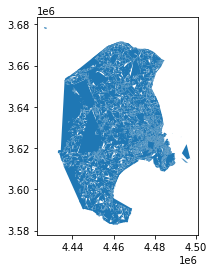

In [43]:
# Generalize geometry 
data['geom_gen'] = data.simplify(tolerance=25000) 
# Set geometry to be our new simlified geometry 
data = data.set_geometry('geom_gen') 

# Plot 
data.plot()
